# 1. Import libraries

In [1]:
import io
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

# 2. Import datasets

In [4]:
df = pd.read_csv("Bank_Data_Bin.csv")
df.shape

(1100, 7)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEAFULTED,1100.0,0.410909,0.492223,0.000,0.000,0.000,1.000,1.000
age_bin,1100.0,-0.369772,0.360458,-0.762,-0.762,-0.292,-0.163,0.414
home_bin,1100.0,-0.377750,0.544098,-0.761,-0.761,-0.761,0.394,0.394
income_bin,1100.0,-0.423554,0.873224,-1.559,-1.003,0.208,0.208,1.006
gender_bin,1100.0,-0.360291,0.029543,-0.385,-0.385,-0.385,-0.325,-0.325
household_bin,1100.0,-0.365707,0.245486,-0.641,-0.641,-0.147,-0.147,-0.147
creditlines_bin,1100.0,-0.375680,0.373516,-1.044,-0.652,-0.104,-0.104,-0.104


# 3. Correlation

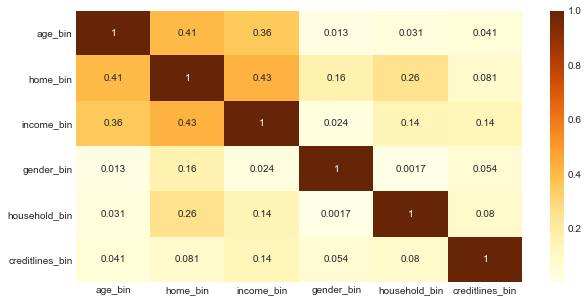

In [6]:
y = df['DEAFULTED']
x = df[['age_bin', 'home_bin', 'income_bin', 'gender_bin', 'household_bin', 'creditlines_bin']]
sns.heatmap(x.corr().abs(),cmap="YlOrBr",annot = True);

# 4. Model - 1st iteration

In [7]:
y = df['DEAFULTED']
x = df[['age_bin', 'home_bin', 'income_bin', 'gender_bin', 'household_bin', 'creditlines_bin']]
x = sm.add_constant(x)
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.554095
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DEAFULTED   No. Observations:                 1100
Model:                          Logit   Df Residuals:                     1093
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1818
Time:                        16:58:00   Log-Likelihood:                -609.50
converged:                       True   LL-Null:                       -744.91
Covariance Type:            nonrobust   LLR p-value:                 1.459e-55
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.6280      0.876      1.859      0.063      -0.088       3.344
age_bin       

# 5. Model - 2nd iteration

In [8]:
y = df['DEAFULTED']
x = df[['home_bin', 'income_bin', 'household_bin', 'creditlines_bin']]
x = sm.add_constant(x)
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.554393
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DEAFULTED   No. Observations:                 1100
Model:                          Logit   Df Residuals:                     1095
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 May 2022   Pseudo R-squ.:                  0.1813
Time:                        16:58:00   Log-Likelihood:                -609.83
converged:                       True   LL-Null:                       -744.91
Covariance Type:            nonrobust   LLR p-value:                 2.965e-57
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0242      0.158      6.496      0.000       0.715       1.333
home_bin      

# 6. AUROC and Gini

In [9]:
pred_values = log_reg.predict(x)
pred_values = pd.DataFrame(pred_values)[0]
print('AUROC:',np.round(roc_auc_score(y, pred_values), 3))

AUROC: 0.78


In [10]:
auroc = roc_auc_score(y, pred_values)
gini = 2 * auroc - 1
print('Gini:',np.round(gini, 3))

Gini: 0.56


# 7. F1 Score and Accuracy

In [11]:
train_dict = {'actuals':y, 'predicted':pred_values}
test_calc = pd.DataFrame(train_dict)

In [12]:
def cut_off (x):
    if x > 0.5: return 1
    else: return 0
test_calc['flag'] = test_calc['predicted'].apply(cut_off)
print(confusion_matrix(test_calc['actuals'],test_calc['flag']))

[[501 147]
 [150 302]]


In [13]:
c = confusion_matrix(test_calc['actuals'],test_calc['flag'])
print('Accuracy:',np.round((c[0][0] + c[1][1]) / c.sum(),3))

Accuracy: 0.73


In [14]:
p = c[1][1] / (c[1][1] + c[0][1])
r = c[1][1] / (c[1][1] + c[1][0])
print('F1 Score:',np.round((2 * p * r) / (p + r),3))

F1 Score: 0.67


In [15]:
print(np.round(precision_score(test_calc['actuals'],test_calc['flag']),3))
print(np.round(recall_score(test_calc['actuals'],test_calc['flag']),3))

0.673
0.668
